# Simple Linear Regression

Regresja liniowa to metoda modelowania zależności pomiędzy skalarną zmienną zależną - y oraz zmienną niezależną oznaczoną przez X. Przypadek, w któym mamy do czynienia z pojedyńczą zmienną niezależną nazywamy prostą regresją liniową. Wartości nieznane modelu liniowego obliczane są na podstawie dostarczonych danych. Jak wszystkie formy analizy poprzez regresję, regresja liniowa skupia się na rozkładzie warunkowego prawdopodobieństwa zmiennej y przy danym X. 

### 1. Import i wstępna obróbka danych

Import pakietu pandas pozwala między innymi na łatwe wczytywanie i zarządzanie danymi z pliku CSV. Dane w Pandas przechowywane są w DataFrame. Jest to dwuwymiarowa, zmienna, struktura danych w postaci tabeli z oznaczonymi osiami (wiersze i kolumny).

In [1]:
import pandas as pd

Pobranie zbioru danych z pliku CSV:

In [2]:
dataset = pd.read_csv('Salary_Dataset.csv')

Całość DataFrame można wyświetlić na ekran przy użyciu komendy display. Komenda head pozwala za na wyświetlenie pierwszych n wierszy DataFrame.

In [3]:
# display(dataset)
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

### 2. Wizualizacja danych wejściowych przy użyciu biblioteki plotly

Pobieramy pakiet ploty.ofline który pozwoli nam na tworzenie wykresów.

In [5]:
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

Mamy tylko jeden zestaw danych, który stanowią pary z list X i Y. Pary te zostaną zwizualizowane w postaci punktów.

In [6]:
trace = go.Scatter(x = X, y = Y, mode = 'markers')

In [7]:
data = [trace]

Opis wykresu oraz osi.

In [8]:
layout = go.Layout(
    title='Wizualizacja zastawu danych',
    titlefont=dict(
            size=25
        ),
    xaxis=dict(
        title='Staż pracy',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Zarobki',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        )
    )
)

In [9]:
fig = go.Figure(data=data, layout=layout)

Zapisywanie wykresu na dysku.

In [10]:
# plot(fig, filename='basic-scatter', image='png', image_filename='wykres1_plotly')

### 3. Wizualizacja danych wejściowych przy użyciu biblioteki seaborn

In [11]:
import seaborn as sns
%matplotlib inline
# Utworzony wykres pojawia sie wewnątrz zeszytu

In [12]:
sns.set()

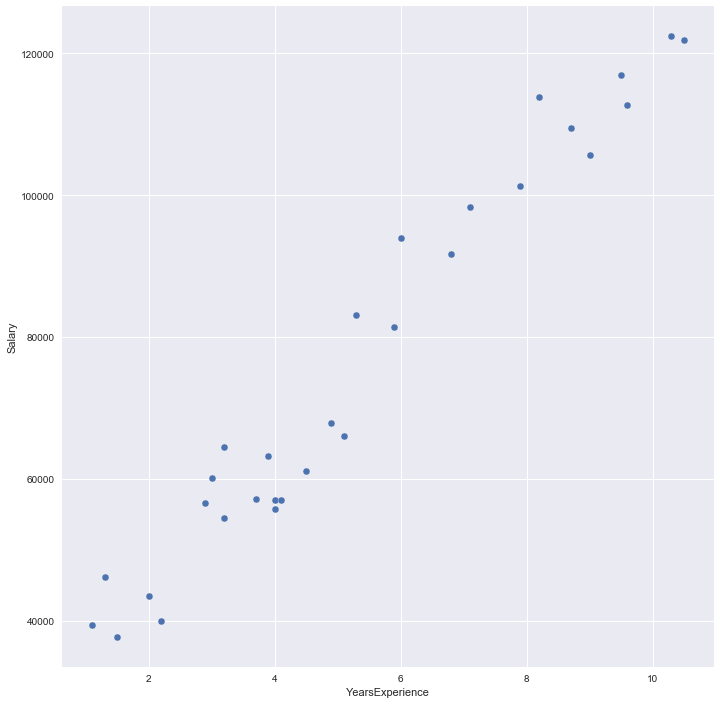

In [13]:
sns.pairplot(data=dataset, x_vars='YearsExperience', y_vars='Salary', size=10)

Wyraźnie widać, że istnieje liniowa korelacja pomiędzy stażem pracy a wielkością pensji. Spróbujmy zbadać tą relację.

### 4. Analiza danych przy użyciu biblioteki sklearn

Przed przystapieniem do analizy należy podzielić zestaw danych na dwie grupy: treningową i testową. Aby tego dokonać pobieramy train_test_split.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

Prosta regresja liniowa, polega na przwidywaniu wartości na podstawie pojedyńczego feature'a. Aby stworzyć model i przwidzieć poszykiwane wartości musimy w pierwszej kolejności nauczyć model jakie są wartosci wpółczynników. Współczynniki są obiczane poprzez minimalizowanie funkcji sumy kwadratów residuów.

Import klasy przeprowadzającej liniową regresję:

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(fit_intercept =True)

In [18]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
regressor.coef_

array([ 9345.94244312])

In [20]:
regressor.intercept_

26816.192244031168

### 5. Analiza danych przy użyciu własnej metody

In [23]:
from Simple_Linear_Regression import MySimpleLinearRegression

In [24]:
my_regressor = MySimpleLinearRegression()

In [25]:
my_regressor.fit(X_train, y_train)

In [26]:
my_regressor.coef_

9345.9424431223761

In [27]:
my_regressor.intercept_

26816.192244031168

Wartości współczynników modeli regresji liniowej wykonanych przy pomocy bibioteki sklearn oraz samodzielnie są identyczne.

### 6. Użycie modelu do wykonania przewidywań

6.1. Przewidywania wykonane przy pomocy biblioteki sklearn:

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
y_pred

array([  40835.10590871,  123079.39940819,   65134.55626083,
         63265.36777221,  115602.64545369,  108125.8914992 ,
        116537.23969801,   64199.96201652,   76349.68719258,
        100649.1375447 ])

In [35]:
my_y_pred = my_regressor.predict(X_test)

In [36]:
my_y_pred

array([[  40835.10590871],
       [ 123079.39940819],
       [  65134.55626083],
       [  63265.36777221],
       [ 115602.64545369],
       [ 108125.8914992 ],
       [ 116537.23969801],
       [  64199.96201652],
       [  76349.68719258],
       [ 100649.1375447 ]])